In [4]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans

np.random.seed(0)

In [5]:
df = pd.read_excel("Indigo_JAI.xlsx",index_col=False)
orgCounter = {}
countList = []

for i, r in df.iterrows():
    if r['ORIGIN'] not in orgCounter:
        orgCounter[r['ORIGIN']] = 1
        
    elif r['ORIGIN'] in orgCounter:
        orgCounter[r['ORIGIN']] += 1
        
for key, value in orgCounter.items():
    if [0,value] not in countList:
        countList.append([0,value])

In [6]:
clusters = 4
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(countList)
print(countList)
print (kmeans.labels_)
labelsList = np.array(kmeans.labels_)

[[0, 14], [0, 2], [0, 1], [0, 3]]
[0 1 3 2]


In [7]:
clusterOrg = {}
clusterRank = {}
clusterCount = {}
clusterAvg = {}
sortedList = []
for i in range(clusters):
    if i not in clusterOrg and i+1 not in clusterRank and i not in clusterCount and i not in clusterAvg:
        clusterOrg[i] = []
        clusterRank[i+1] = []
        clusterCount[i] = []
        clusterAvg[i] = 0
        
        
cc = 0
for i in labelsList:
    for key, value in orgCounter.items():
        if value == countList[cc][1]:
            clusterOrg[i].append(key)
            clusterCount[i].append(value)
    cc+=1

for key, value in clusterCount.items():
    clusterAvg[key] = sum(value)/len(value)
    sortedList.append(sum(value)/len(value))

sortedList = sorted(sortedList)
print(orgCounter)
print(clusterOrg)
print(clusterAvg)
print(sortedList)

{'Jaipur (JAI)': 14, 'Bengaluru (BLR)': 2, 'Chennai (MAA)': 1, 'Delhi (DEL)': 1, 'Hyderabad (HYD)': 2, 'Kolkata (CCU)': 3, 'Mumbai (BOM)': 3, 'Pune (PNQ)': 1}
{0: ['Jaipur (JAI)'], 1: ['Bengaluru (BLR)', 'Hyderabad (HYD)'], 2: ['Kolkata (CCU)', 'Mumbai (BOM)'], 3: ['Chennai (MAA)', 'Delhi (DEL)', 'Pune (PNQ)']}
{0: 14.0, 1: 2.0, 2: 3.0, 3: 1.0}
[1.0, 2.0, 3.0, 14.0]


In [8]:
rr = 1
for s in sortedList:
    cc=0
    for key, value in clusterAvg.items():
        if value == s:
            clusterRank[rr] = clusterOrg[cc]
        cc+=1
    rr+=1
            
print(sortedList)
print(clusterRank)

#Keep track of max and min count of each cluster

[1.0, 2.0, 3.0, 14.0]
{1: ['Chennai (MAA)', 'Delhi (DEL)', 'Pune (PNQ)'], 2: ['Bengaluru (BLR)', 'Hyderabad (HYD)'], 3: ['Kolkata (CCU)', 'Mumbai (BOM)'], 4: ['Jaipur (JAI)']}


In [9]:
maxDelay = 3000
maxRangeStep = {}
countStep = 0
for i in range(clusters):
    if i < clusters-1:
        if i not in maxRangeStep:
            maxRangeStep[i] = (countStep, countStep + math.floor(maxDelay/clusters))
            countStep+=math.floor(maxDelay/clusters)
    if i == clusters-1:
        maxRangeStep[i] = (countStep, maxDelay)        
        
print(maxRangeStep)

{0: (0, 750), 1: (750, 1500), 2: (1500, 2250), 3: (2250, 3000)}


In [10]:
#logic: If the flight leg belongs to the first cluster,
#then the flight leg will be assigned the priority majorly from the first range
#occassionaly from any other range.
#hence need to define a skewed normal distribution which will differ for each cluster,
#the mean and the range will differ
#Create a distribution

clusterFlight = {}
clusterFlightabs = {}

for c in range(clusters):
    if c+1 not in clusterFlight and c+1 not in clusterFlightabs:
        clusterFlight[c+1] = []
        clusterFlightabs[c+1] = []

for key, value in clusterRank.items():
    for i, r in df.iterrows():
        if r['ORIGIN'] in value:
            flightLeg = str(r['ORIGIN']) + str("-") + str(r["DEST"])
            clusterFlightabs[key].append(flightLeg)
            if flightLeg not in clusterFlight[key]:
                clusterFlight[key].append(flightLeg)
            
print(clusterFlightabs)

{1: ['Chennai (MAA)-Jaipur (JAI)', 'Delhi (DEL)-Jaipur (JAI)', 'Pune (PNQ)-Jaipur (JAI)'], 2: ['Bengaluru (BLR)-Jaipur (JAI)', 'Bengaluru (BLR)-Jaipur (JAI)', 'Hyderabad (HYD)-Jaipur (JAI)', 'Hyderabad (HYD)-Jaipur (JAI)'], 3: ['Kolkata (CCU)-Jaipur (JAI)', 'Kolkata (CCU)-Jaipur (JAI)', 'Kolkata (CCU)-Jaipur (JAI)', 'Mumbai (BOM)-Jaipur (JAI)', 'Mumbai (BOM)-Jaipur (JAI)', 'Mumbai (BOM)-Jaipur (JAI)'], 4: ['Jaipur (JAI)-Bengaluru (BLR)', 'Jaipur (JAI)-Bengaluru (BLR)', 'Jaipur (JAI)-Chennai (MAA)', 'Jaipur (JAI)-Delhi (DEL)', 'Jaipur (JAI)-Delhi (DEL)', 'Jaipur (JAI)-Delhi (DEL)', 'Jaipur (JAI)-Delhi (DEL)', 'Jaipur (JAI)-Hyderabad (HYD)', 'Jaipur (JAI)-Hyderabad (HYD)', 'Jaipur (JAI)-Kolkata (CCU)', 'Jaipur (JAI)-Kolkata (CCU)', 'Jaipur (JAI)-Mumbai (BOM)', 'Jaipur (JAI)-Mumbai (BOM)', 'Jaipur (JAI)-Mumbai (BOM)']}


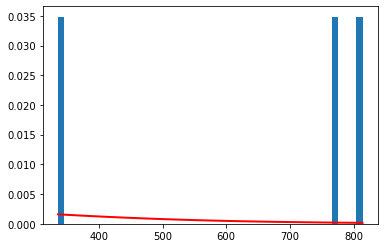

[770.82443645 335.77213677 814.06984116]


In [11]:
shape, scale = 2., 150.
fcount = len(clusterFlightabs[1])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))

plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

flag = []
for i in range(len(df)):
    flag.append(0)
    
df['Flag'] = flag

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[1]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1
                        
# for i, r in df.iterrows():
#     if r["ARR_DELAY_NEW"] > 0:
#         print(r["ARR_DELAY_NEW"])
# df.drop('Flag', inplace=True, axis=1)                       
# df.to_excel("testDataDay1_AA_150_revised_withdelay.xlsx")

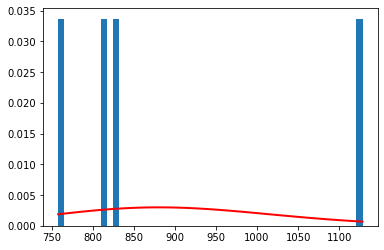

[1128.51849169  814.03174447  824.57803412  757.45180778]


In [12]:
shape, scale = 45., 20.
fcount = len(clusterFlightabs[2])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[2]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1

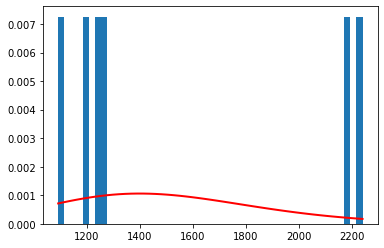

[2180.83832847 1244.63524628 1273.54863824 1092.93173265 2241.49471475
 1194.03459101]


In [13]:
shape, scale = 15, 100.
fcount = len(clusterFlightabs[3])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[3]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1
# df.drop('Flag', inplace=True, axis=1)                       
# df.to_excel("testDataDay1_AA_150_revised_withdelay.xlsx")

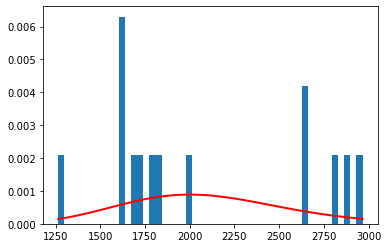

[2896.54552931 1800.84683472 1835.73539569 1616.25764113 2965.67519516
 1739.57258777 2805.15491863 1264.46340968 2626.12023396 1605.89074257
 1989.26663212 1692.72360391 1605.61106905 2631.9668336 ]


In [14]:
shape, scale = 21., 100.
fcount = len(clusterFlightabs[4])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[4]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1
# df.drop('Flag', inplace=True, axis=1)                       
# df.to_excel("testDataDay1_AA_150_revised_withdelay.xlsx")

In [15]:
shape, scale = 27., 100.
fcount = len(clusterFlightabs[5])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)

# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[5]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1

# print(df["ARR_DELAY_NEW"])
                        
df.drop('Flag', inplace=True, axis=1)
# df.to_excel("testDataDay1_AA_20_revised_withdelay.xlsx")

KeyError: 5

In [16]:
airport_res = []
airport_res.append(('ORIGIN', 'COUNT', 'CLUSTER_ID'))
print(ocount)
ffcounter = 0
for f in flightSorted:
    for key, value in clusterRank.items():
        if f in value:
            airport_res.append((f, ocount[ffcounter], key))
        
    ffcounter+=1
    
print(airport_res)

pd.DataFrame(airport_res).to_excel('Indigo_airport_res_20.xlsx', header=False, index=False)

[14, 3, 3, 2, 2, 1, 1, 1]
[('ORIGIN', 'COUNT', 'CLUSTER_ID'), ('Jaipur (JAI)', 14, 4), ('Kolkata (CCU)', 3, 3), ('Mumbai (BOM)', 3, 3), ('Bengaluru (BLR)', 2, 2), ('Hyderabad (HYD)', 2, 2), ('Chennai (MAA)', 1, 1), ('Delhi (DEL)', 1, 1), ('Pune (PNQ)', 1, 1)]


In [17]:
adf = pd.read_excel("Indigo_airport_res_20.xlsx",index_col=False)
cid = []

list_zeroes = list(np.zeros(len(df)))
df["CLUSTER_ID"] = list_zeroes

for i, r in adf.iterrows():
    for ii, rr in df.iterrows():
        if r["ORIGIN"] == rr["ORIGIN"]:
            df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
#             cid.insert(ii, r["CLUSTER_ID"])

# df["CLUSTER_ID"] = cid
df.to_excel('Indigo_JAI_withdelay.xlsx')       

<ipython-input-17-0c97bb18faef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
